<a href="https://colab.research.google.com/github/KOMBOU12/Marius/blob/main/Projet_TDA%2B_Signature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📝Projet TDA + Signature**

Chaque fichier est composé de 10 colonnes :

🔹 Une colonne Temps (`temps`) - temps en ms ;

🔹8 colonnes de canaux EMG du bracelet MYO Thalmic (`channel1`... `channel8`) :  

*   0 - données non marquées `channel1`,
*   1 - main au repos `channel2`,
*   2 - main serrée en poing `channel3`,
*   3 - flexion du poignet `channel4`,
*   4 - extension du poignet `channel5`,
*   5 - déviations radiales `channel6`,
*   6 - déviations ulnaires `channel7`,
*   7 - paume étendue (le geste n'a pas été effectué par tous les sujets) `channel8`

🔹Une colonne `class` - le label des gestes. On a 7 classes uniques de 0 à 6.


**Objectif: L'objectif principal** est de prédire la valeur de la colonne `class` en fonction des données fournies par les 8 canaux en appliquant les méthodes de TDA.

**1- Description des données**

In [ ]:
import pandas as pd
# URL du fichier de données
url = "https://remivaucher.github.io/files/1_raw_data_13-12_22.03.16.txt"

# Charger les données dans un DataFrame
data = pd.read_csv(url, sep="\t")

# Afficher les premières lignes du DataFrame pour vérifier
data.head(10)

time  channel1  channel2  channel3  channel4  channel5  channel6  channel7  \
0     1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
1     5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
2     6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
3     7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
4     8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
5     9  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
6    10  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
7    11  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
8    12  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
9    13  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   

   channel8  class  
0  -0.00001      0  
1  -0.00001      0  
2   0.00001      0  
3   0.00001      0  
4   0.00001      0  
5   0.00001      0  
6   0.00001      0  
7   0.00001      0  
8   0.00001      0  
9   0.00001      0

Notre jeu de données a **63196** lignes.

In [ ]:
data.shape

(63196, 10)

**🧮 Nombre de classes du jeu de données**

In [ ]:
# Calculer le nombre de classes uniques dans la colonne 'Class'
nombre_classes = data['class'].nunique()

# Afficher le nombre de classes
print("Nombre de classes uniques :", nombre_classes)

# Pour voir la liste des classes uniques
classes_uniques = data['class'].unique()
print("Classes uniques :", classes_uniques)

Nombre de classes uniques : 7
Classes uniques : [0 1 2 3 4 5 6]


In [ ]:
sumarize = data.describe()
print(sumarize)

               time      channel1      channel2      channel3      channel4  \
count  63196.000000  63196.000000  63196.000000  63196.000000  63196.000000   
mean   32777.490094     -0.000008     -0.000009     -0.000009     -0.000010   
std    18943.835626      0.000144      0.000134      0.000124      0.000155   
min        1.000000     -0.001110     -0.001020     -0.000910     -0.001040   
25%    16340.750000     -0.000030     -0.000040     -0.000050     -0.000040   
50%    32781.500000     -0.000010     -0.000010     -0.000010     -0.000010   
75%    49199.250000      0.000010      0.000020      0.000030      0.000020   
max    65661.000000      0.001270      0.001270      0.001270      0.001270   

           channel5     channel6      channel7      channel8         class  
count  63196.000000  63196.00000  63196.000000  63196.000000  63196.000000  
mean      -0.000012     -0.00001     -0.000008     -0.000008      1.212086  
std        0.000198      0.00016      0.000133      0.000

**Qualité des données**

In [ ]:
# Qualité des données
print("\nValeurs manquantes par colonne:")
print(data.isnull().sum())
print("\nNombre de doublons:")
print(data.duplicated().sum())


Valeurs manquantes par colonne:
time        0
channel1    0
channel2    0
channel3    0
channel4    0
channel5    0
channel6    0
channel7    0
channel8    0
class       0
dtype: int64

Nombre de doublons:
0


Il n'y a pas de valeurs manquantes, pas de doublons.

In [ ]:
distribution_classes = data['class'].value_counts()
print(distribution_classes)

class
0    41272
3     3816
1     3780
6     3747
5     3615
2     3525
4     3441
Name: count, dtype: int64


⚖️  La distribution montre un **déséquilibre** important entre les classes. Par exemple, la classe 0 contient 41 272 occurrences, alors que les autres classes en contiennent entre 3 441 et 3 816 occurrences. Cela pourrait poser des problèmes pour l'entraînement de modèles de Machine Learning, car les classes minoritaires risquent d'être sous-représentées dans les prédictions.

La somme de tous les nombres de classe est de (41272+3816+3780+3747+3615+3525+3441)= 63 196, ce qui correspond au nombre de lignes de notre data set (`data.shape = (63 196, 10)`)  

**📊 Histogramme pour les variables numérique**s

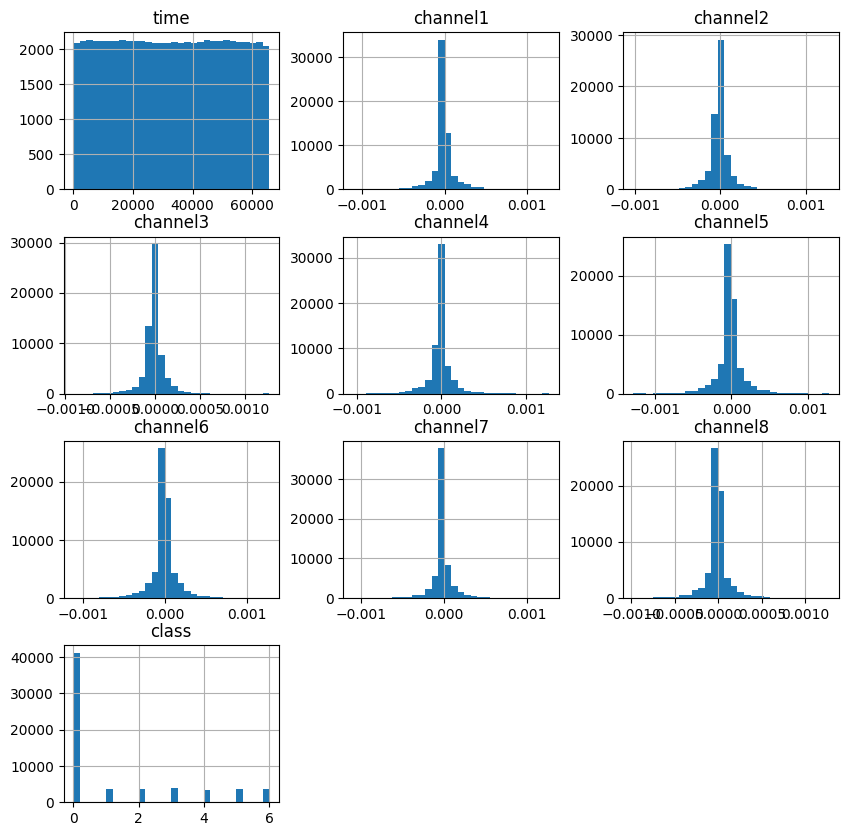

In [ ]:
# Histogramme pour les variables numériques
import matplotlib.pyplot as plt
data.hist(bins=30, figsize=(10, 10))
plt.show()

La classe 0 représente des **"données non marquées"** ou une situation de "repos" ou "absence de geste", il est **normal qu'elle soit plus fréquente**, surtout dans les contextes où les gestes spécifiques ne sont exécutés que brièvement et/ou moins fréquemment. Ensuite la classe 3 est la plus fréquente. D'accord que ce n'est pas très visible sur mon histogramme.

**Heatmap**

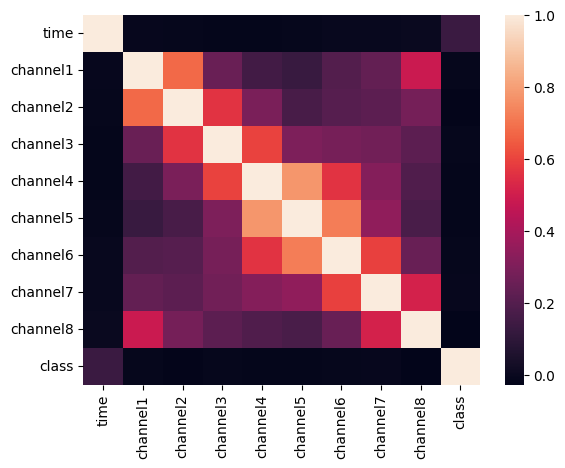

In [ ]:
# heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr())
plt.show()

💡 On observe pas une corrélation entre un channel et class. Il n'y a pas un channel qui a plus d'impact que d'autres sur la classe. On observe une corrélation entre le "channel 4" et le "channel 5", entre "channel 6" et le "channel 5", "channel 1" et le "channel 2".

## **2. Découper la série temporelle de manière à récupérer plusieurs séries à label unique**

In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Charger les données
url = "https://remivaucher.github.io/files/1_raw_data_13-12_22.03.16.txt"
data = pd.read_csv(url, sep="\t")

# Découper la série en sous-séries avec labels uniques
changes = data['class'].diff().ne(0)
change_indices = changes[changes].index.tolist()
if 0 not in change_indices:
    change_indices.insert(0, 0)
change_indices.append(len(data))

# Créer les sous-séries
sub_series = []
for i in range(len(change_indices) - 1):
    sub_series.append(data.iloc[change_indices[i]:change_indices[i + 1]])


**Normalisation** : on exclut la colonne `class` car si on normalise la colonne `class`, on va modifiez ses valeurs d'origine, ce qui peut rendre les étiquettes incompréhensibles ou inutilisables pour l'apprentissage supervisé.

In [14]:
# Vérifier que chaque sous-série a un label unique
for sub in sub_series:
    assert sub['class'].nunique() == 1, "Une sous-série contient plusieurs labels."

# Normalisation des sous-séries
scaler = MinMaxScaler()
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.drop('class')
normalized_sub_series = []

On **visualise** les sous-séries normalisées

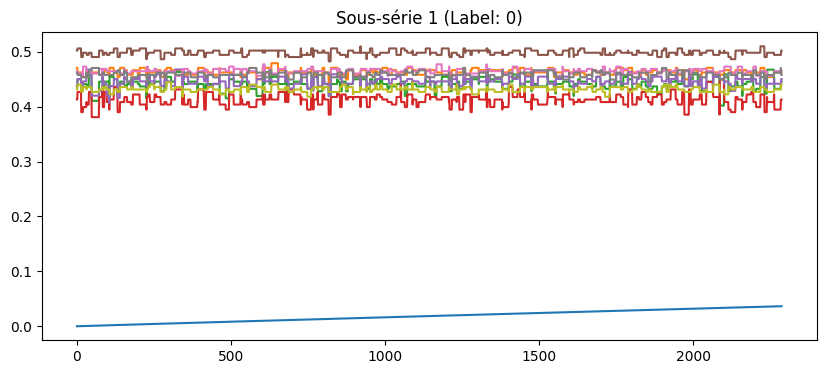

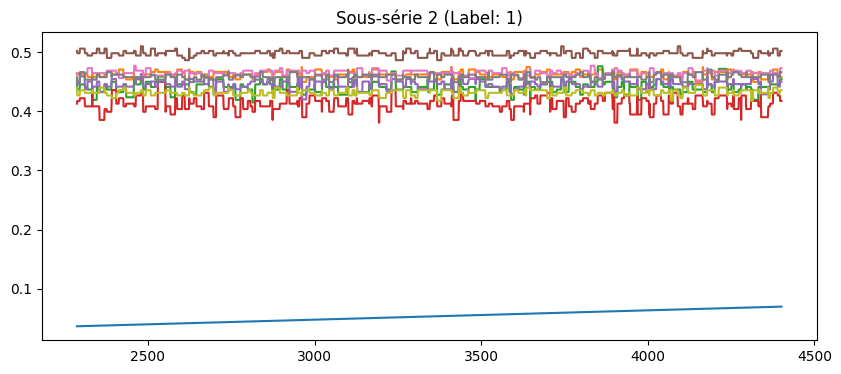

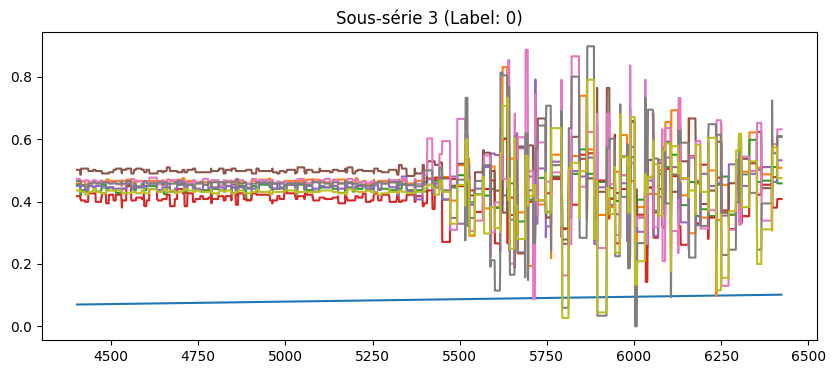

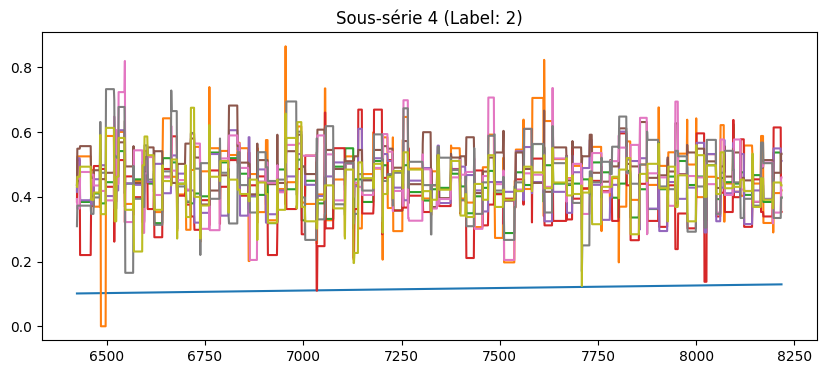

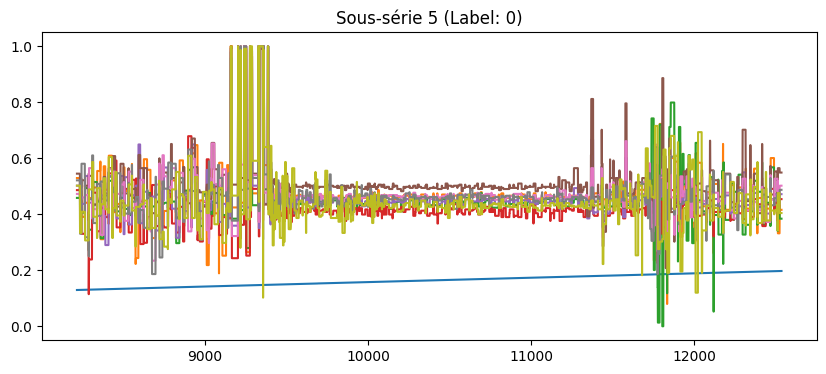

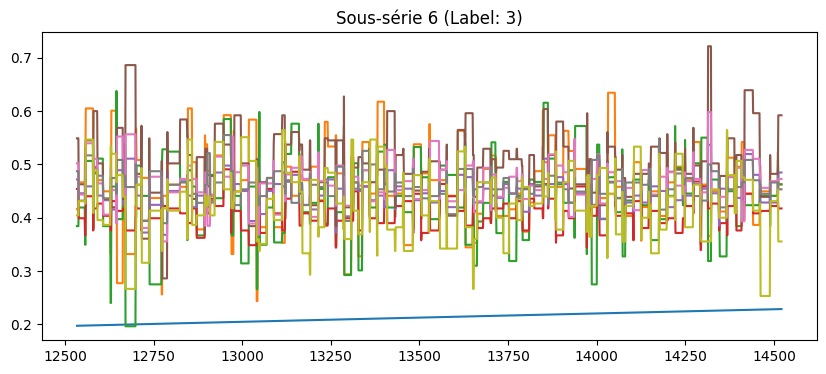

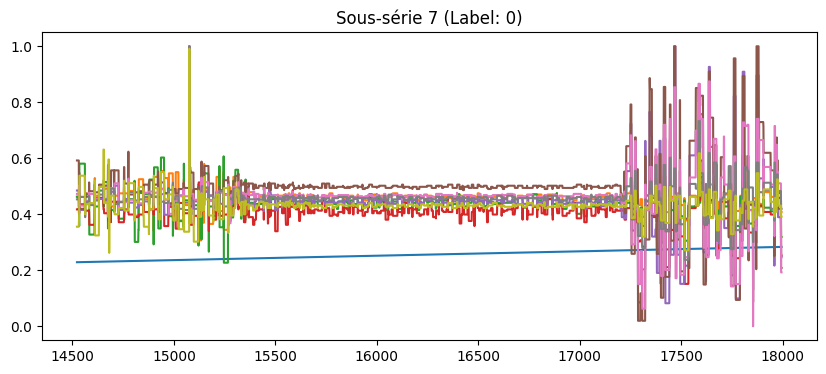

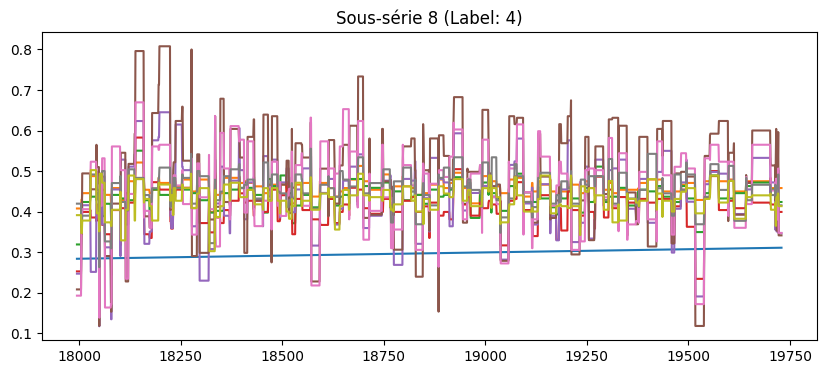

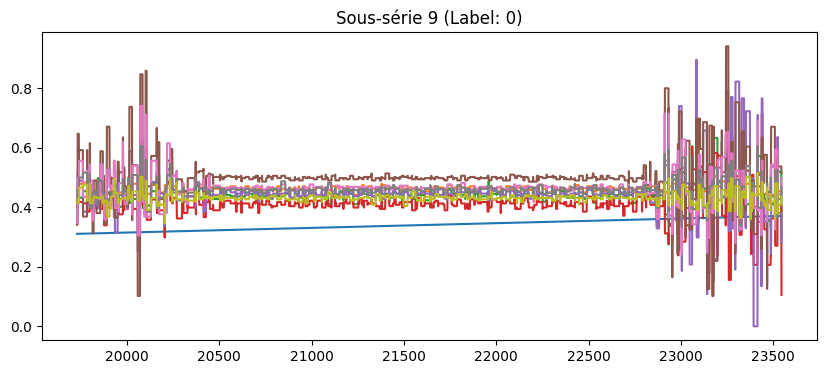

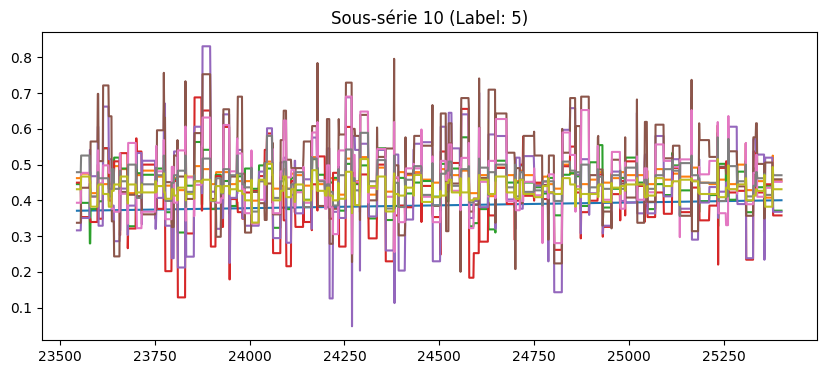

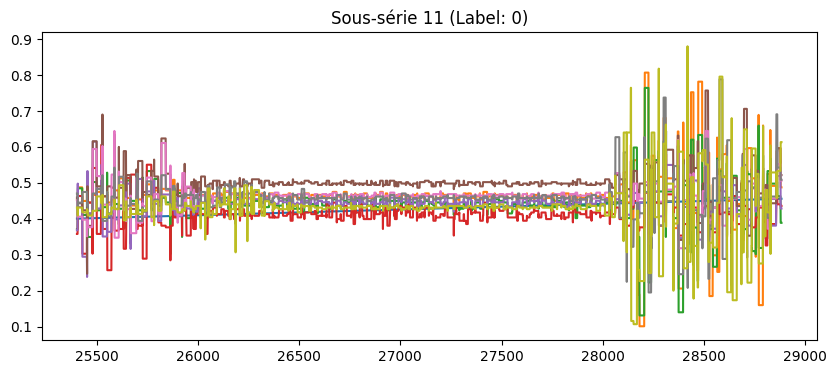

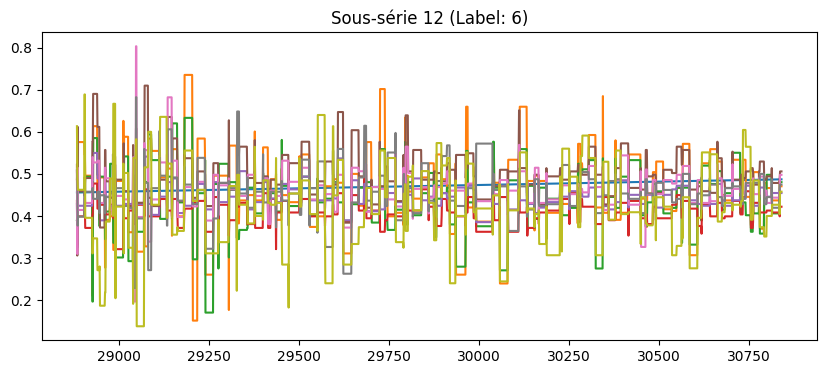

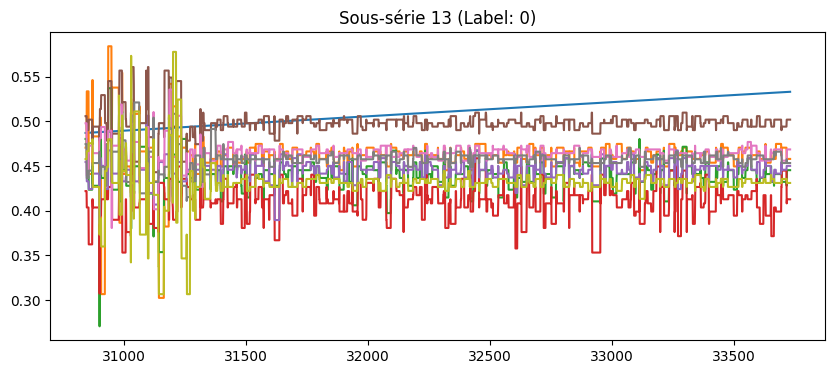

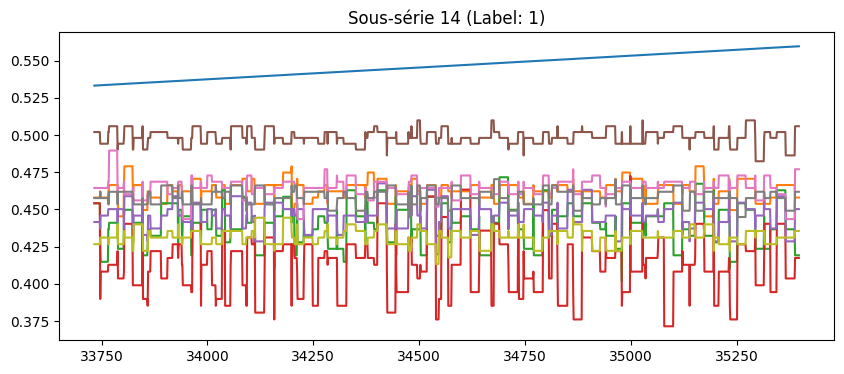

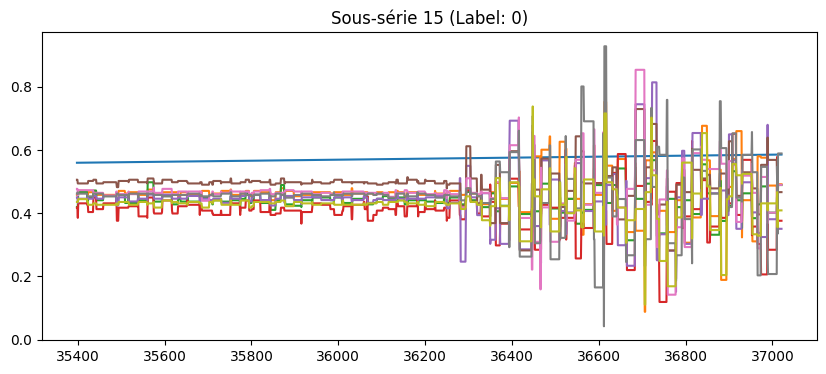

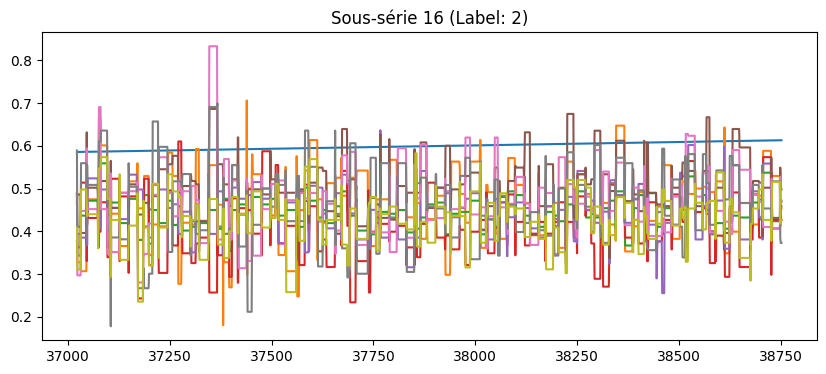

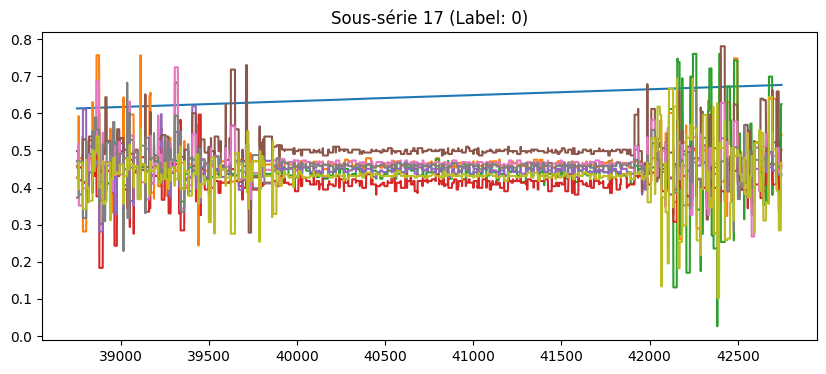

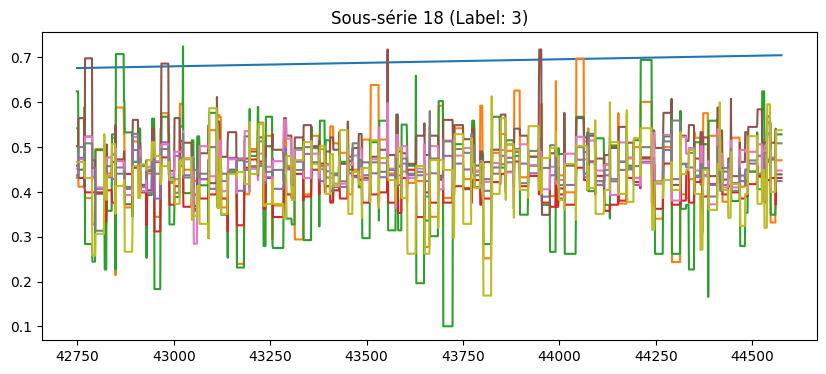

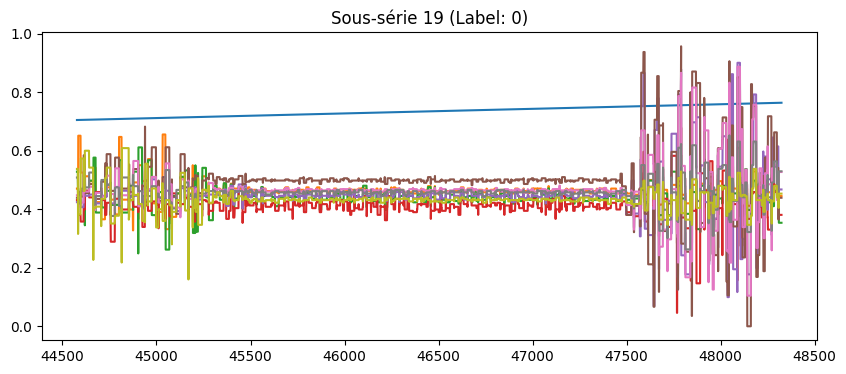

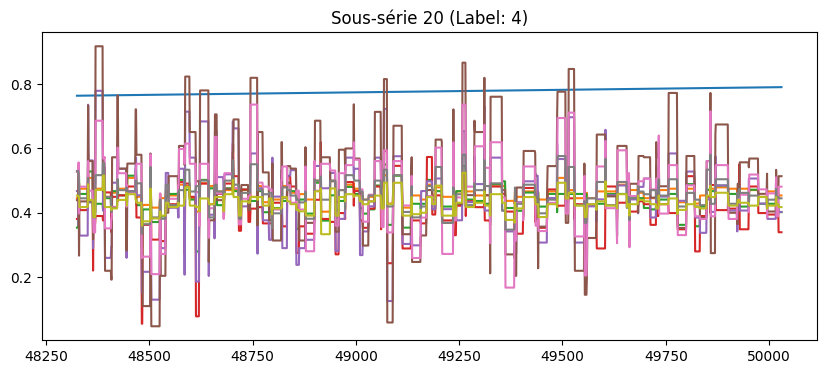

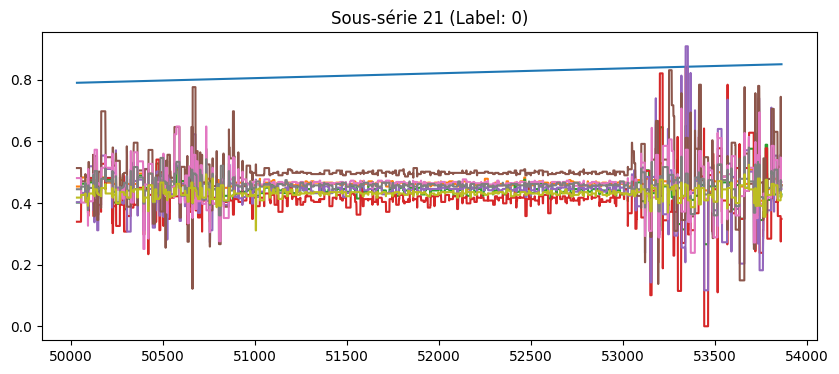

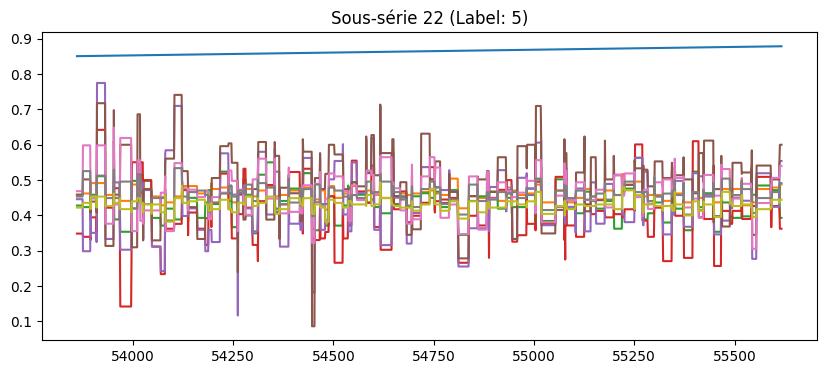

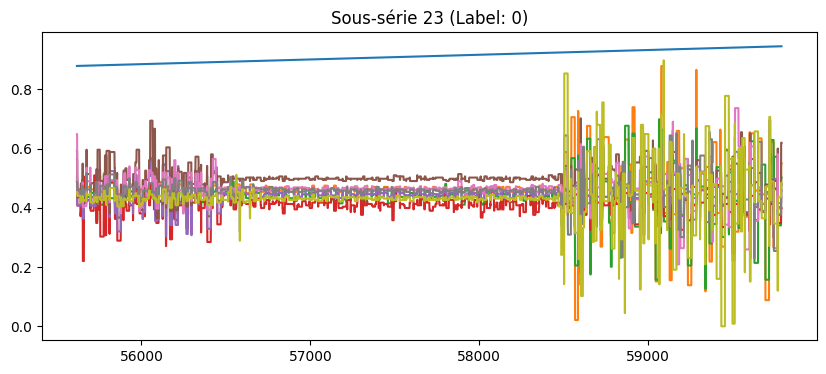

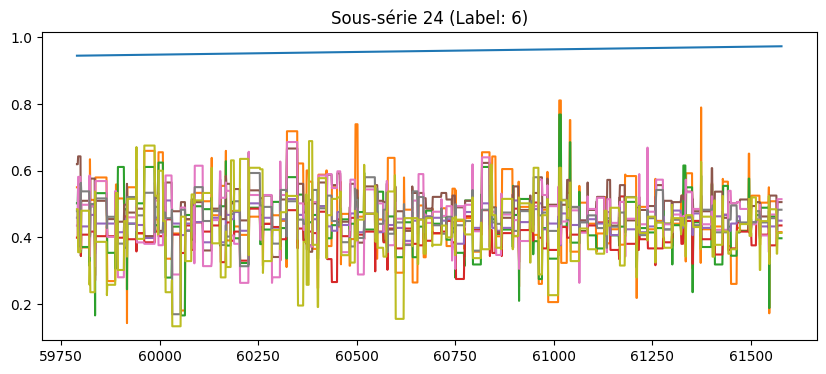

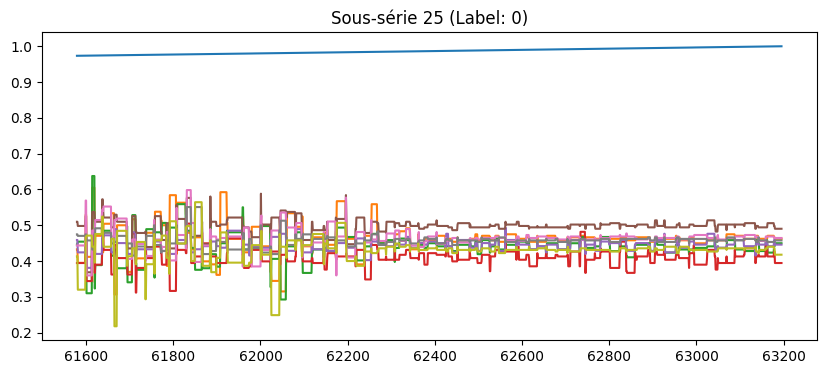

In [15]:
# Appliquer la normalisation
scaler.fit(data[numeric_columns])  # Normalisation globale
for sub in sub_series:
    sub_scaled = sub.copy()
    sub_scaled[numeric_columns] = scaler.transform(sub[numeric_columns])
    normalized_sub_series.append(sub_scaled)

# Visualiser les sous-séries normalisées
for i, sub in enumerate(normalized_sub_series):
    plt.figure(figsize=(10, 4))
    plt.plot(sub[numeric_columns])
    plt.title(f"Sous-série {i + 1} (Label: {sub['class'].iloc[0]})")
    plt.show()

## **3. Utiliser la TDA pour créer un modèle de classification. Que peut on dire?**

Installation des bibliothèques Python

In [20]:
!pip install gudhi
!pip install giotto-tda
!pip install giotto-tda scikit-learn matplotlib

 Importation des bibliothèques nécessaires pour effectuer une analyse de données

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceEntropy, Amplitude

Extraction des **caractéristiques topologiques**. *Temps d'exécution : 28 min*

In [22]:
############## Pour avoir un temps d'exécution plus rapide#####
from sklearn.metrics import accuracy_score, pairwise_distances
# Sous-échantillonnage des séries temporelles
time_series_data = [sub[numeric_columns].values[::2] for sub in normalized_sub_series]

# Pré-calcul des matrices de distance
distance_matrices = [pairwise_distances(series) for series in time_series_data]

# Calcul des diagrammes de persistance avec parallélisation et optimisation
persistence = VietorisRipsPersistence(
    homology_dimensions=[0, 1],
    max_edge_length=1.0,
    collapse_edges=True,
    n_jobs=-1
)
diagrams = persistence.fit_transform(distance_matrices)
######################################################

# Convertir les sous-séries en un format adapté à la TDA
time_series_data = [sub[numeric_columns].values for sub in normalized_sub_series]
labels = [sub['class'].iloc[0] for sub in normalized_sub_series]

# Calculer les diagrammes de persistance
# homology_dimensions = [0, 1]  # Dimensions d'homologie à calculer (0 pour les composantes connexes, 1 pour les cycles)
# persistence = VietorisRipsPersistence(homology_dimensions=homology_dimensions)
# diagrams = persistence.fit_transform(time_series_data)

# Extraire des caractéristiques à partir des diagrammes de persistance
entropy = PersistenceEntropy()
amplitude = Amplitude(metric='wasserstein')

X_entropy = entropy.fit_transform(diagrams)
X_amplitude = amplitude.fit_transform(diagrams)

# Combiner les caractéristiques
X = np.hstack([X_entropy, X_amplitude])
y = np.array(labels)

/usr/local/lib/python3.10/dist-packages/gtda/homology/simplicial.py:232: DataDimensionalityWarning: All arrays/matrices are square. This is consistent with a collection of distance/adjacency matrices, but the entries will be treated as collections of vectors in Euclidean space.
  check_point_clouds(X, accept_sparse=True,
/usr/local/lib/python3.10/dist-packages/gtda/homology/simplicial.py:299: DataDimensionalityWarning: All arrays/matrices are square. This is consistent with a collection of distance/adjacency matrices, but the entries will be treated as collections of vectors in Euclidean space.
  X = check_point_clouds(X, accept_sparse=True,


Entraînement d'un modèle de **classification**

In [10]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner un classifieur (par exemple, une forêt aléatoire)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = clf.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.33



*   L'évaluation de notre modèle donne une **précision globale de 40%**, ce
 qui suggère que le modèle a du mal à distinguer les classes.
*   Le jeu de données est déséquilibré : certaines classes ont très peu d'exemples **(2, 5)**, ce qui rend difficile l'apprentissage de ces classes pour le modèle.
*   Le modèle a tendance à privilégier la classe 0 (majoritaire dans le jeu de test).
*   Avec seulement **17 séries** pour l'entraînement et **8 séries** pour le test, le jeu de données est peut-être très petit, ce qui limite la capacité du modèle à généraliser.

In [11]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='viridis')
plt.colorbar()
plt.title("Visualisation t-SNE des caractéristiques topologiques")
plt.show()

ValueError: perplexity must be less than n_samples

In [ ]:
!pip install --upgrade gudhi



---



## **4. Faire de même en enlevant les classes 0. Que peut on dire?**

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceEntropy, Amplitude
import numpy as np

# Charger les données
url = "https://remivaucher.github.io/files/1_raw_data_13-12_22.03.16.txt"
data = pd.read_csv(url, sep="\t")

# Découper la série en sous-séries avec labels uniques
changes = data['class'].diff().ne(0)
change_indices = changes[changes].index.tolist()
if 0 not in change_indices:
    change_indices.insert(0, 0)
change_indices.append(len(data))

# Créer les sous-séries
sub_series = []
for i in range(len(change_indices) - 1):
    sub_series.append(data.iloc[change_indices[i]:change_indices[i + 1]])

On enlève la **classe 0**

In [ ]:
# Filtrer les sous-séries pour supprimer la classe 0
filtered_sub_series = [sub for sub in sub_series if sub['class'].iloc[0] != 0]


In [ ]:
# Vérifier que chaque sous-série a un label unique
for sub in filtered_sub_series:
    assert sub['class'].nunique() == 1, "Une sous-série contient plusieurs labels."

# Normalisation des sous-séries filtrées
scaler = MinMaxScaler()
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.drop('class')
normalized_sub_series = []

In [6]:
# Appliquer la normalisation
scaler.fit(data[numeric_columns])  # Normalisation globale
for sub in filtered_sub_series:
    sub_scaled = sub.copy()
    sub_scaled[numeric_columns] = scaler.transform(sub[numeric_columns])
    normalized_sub_series.append(sub_scaled)

# Convertir les sous-séries en un format adapté à la TDA
time_series_data = [sub[numeric_columns].values for sub in normalized_sub_series]
labels = [sub['class'].iloc[0] for sub in normalized_sub_series]

# Calculer les diagrammes de persistance
homology_dimensions = [0, 1]  # Dimensions d'homologie à calculer (0 pour les composantes connexes, 1 pour les cycles)
persistence = VietorisRipsPersistence(homology_dimensions=homology_dimensions)
diagrams = persistence.fit_transform(time_series_data)

# Extraire des caractéristiques à partir des diagrammes de persistance
entropy = PersistenceEntropy()
amplitude = Amplitude(metric='wasserstein')

X_entropy = entropy.fit_transform(diagrams)
X_amplitude = amplitude.fit_transform(diagrams)

# Combiner les caractéristiques
X = np.hstack([X_entropy, X_amplitude])
y = np.array(labels)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner un classifieur (par exemple, une forêt aléatoire)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = clf.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.33


Même en supprimant la classe 0 on ne s'en sors pas. Je pense qu'on devrait essayer **d'augmenter la taille** du jeu de données, on peut également **filtrer ou lisser** les séries temporelles pour réduire le bruit.

##  **5. Créer le complexe simplicial sur les séries temporelles de la question 2 Pouvait on deviner la différence entre les questions 3 et 4 en regardant la persistance de ce complexe?**  

J'installe les bibliothèques nécessaires

In [1]:
!pip install gudhi
!pip install giotto-tda

Importaion des données

In [3]:
import pandas as pd
# URL du fichier de données
url = "https://remivaucher.github.io/files/1_raw_data_13-12_22.03.16.txt"

# Charger les données dans un DataFrame
data = pd.read_csv(url, sep="\t")

# Afficher les premières lignes du DataFrame pour vérifier
data['class'].unique()

array([0, 1, 2, 3, 4, 5, 6])

On applique une **normalisation** avec `MinMaxScaler`

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Identifier les colonnes numériques (en excluant la colonne 'class' si elle existe)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Créer une instance de MinMaxScaler
scaler = MinMaxScaler()

# Appliquer la normalisation uniquement aux colonnes numériques
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

On conserve les sous-séries basées sur les changements de labels

In [8]:
# Identifier où les changements de label se produisent
changes = data['class'].diff().ne(0)  # diff() calcule la différence entre chaque élément et son précédent
change_indices = changes[changes].index.tolist()  # récupérer les indices des changements

# Ajouter le premier index de la série et le dernier index de la série pour compléter les sous-séries
if 0 not in change_indices:
    change_indices.insert(0, 0)
change_indices.append(len(data))

# Créer les sous-séries
sub_series = []
for i in range(len(change_indices) - 1):
    sub_series.append(data.iloc[change_indices[i]:change_indices[i + 1]])


In [9]:
import gudhi as gd
from sklearn.preprocessing import MinMaxScaler


In [7]:
# Normalisation des colonnes numériques de chaque sous-série
normalized_sub_series = []
scaler = MinMaxScaler()

for sub in sub_series:
    # Identifier les colonnes numériques
    numeric_columns = sub.select_dtypes(include=['float64', 'int64']).columns

    # Normaliser les colonnes numériques
    sub_scaled = sub.copy()
    sub_scaled[numeric_columns] = scaler.fit_transform(sub[numeric_columns])
    normalized_sub_series.append(sub_scaled)


On crée des **complexes simpliciaux** pour chaque sous-série, basés sur le modèle de Vietoris-Rips.

In [ ]:
import gc
# Paramètres pour la filtration de Rips
max_edge_length = 0.5  # Longueur maximale des arêtes
max_dimension = 2      # Dimension maximale des simplices

rips_complexes = []
batch_size = 10
max_points = 50  # Limite encore plus stricte pour chaque sous-série
for batch_start in range(0, len(normalized_sub_series), batch_size):
    batch = normalized_sub_series[batch_start:batch_start + batch_size]
    for i, sub in enumerate(batch):
        # Réduction des points
        if len(sub) > max_points:
            sub = sub.sample(n=max_points, random_state=42)

        # Extraction des points
        point_cloud = sub.select_dtypes(include=['float64', 'int64']).values

        # Création du complexe de Rips
        rips_complex = gd.RipsComplex(points=point_cloud, max_edge_length=max_edge_length)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=max_dimension)

        # Option : Ne pas sauvegarder tous les complexes
        print(f"Sous-série {batch_start + i + 1}: Complexe créé avec {simplex_tree.num_simplices()} simplices.")
    gc.collect()


Sous-série 1: Complexe créé avec 628 simplices.
Sous-série 2: Complexe créé avec 244 simplices.
Sous-série 3: Complexe créé avec 3244 simplices.
Sous-série 4: Complexe créé avec 389 simplices.
Sous-série 5: Complexe créé avec 9518 simplices.
Sous-série 6: Complexe créé avec 1076 simplices.
Sous-série 7: Complexe créé avec 3812 simplices.
Sous-série 8: Complexe créé avec 1301 simplices.
Sous-série 9: Complexe créé avec 6456 simplices.
Sous-série 10: Complexe créé avec 742 simplices.
Sous-série 11: Complexe créé avec 6809 simplices.
Sous-série 12: Complexe créé avec 1274 simplices.
Sous-série 13: Complexe créé avec 6974 simplices.
Sous-série 14: Complexe créé avec 187 simplices.
Sous-série 15: Complexe créé avec 5067 simplices.
Sous-série 16: Complexe créé avec 672 simplices.
Sous-série 17: Complexe créé avec 5594 simplices.
Sous-série 18: Complexe créé avec 670 simplices.
Sous-série 19: Complexe créé avec 4542 simplices.
Sous-série 20: Complexe créé avec 894 simplices.
Sous-série 21: Co

In [ ]:
import gc
# Paramètres pour la filtration de Rips
max_edge_length = 0.5  # Longueur maximale des arêtes
max_dimension = 2      # Dimension maximale des simplices

rips_complexes = []
batch_size = 10
max_points = 50  # Limite encore plus stricte pour chaque sous-série

for batch_start in range(0, len(normalized_sub_series), batch_size):
    batch = normalized_sub_series[batch_start:batch_start + batch_size]
    for i, sub in enumerate(batch):
        # Réduction des points
        if len(sub) > max_points:
            sub = sub.sample(n=max_points, random_state=42)

        # Extraction des points
        point_cloud = sub.select_dtypes(include=['float64', 'int64']).values

        # Création du complexe de Rips
        rips_complex = gd.RipsComplex(points=point_cloud, max_edge_length=max_edge_length)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=max_dimension)

        # Sauvegarder le complexe simplicial dans la liste
        rips_complexes.append(simplex_tree)

        print(f"Sous-série {batch_start + i + 1}: Complexe créé avec {simplex_tree.num_simplices()} simplices.")
    gc.collect()


Sous-série 1: Complexe créé avec 628 simplices.
Sous-série 2: Complexe créé avec 244 simplices.
Sous-série 3: Complexe créé avec 3244 simplices.
Sous-série 4: Complexe créé avec 389 simplices.
Sous-série 5: Complexe créé avec 9518 simplices.
Sous-série 6: Complexe créé avec 1076 simplices.
Sous-série 7: Complexe créé avec 3812 simplices.
Sous-série 8: Complexe créé avec 1301 simplices.
Sous-série 9: Complexe créé avec 6456 simplices.
Sous-série 10: Complexe créé avec 742 simplices.
Sous-série 11: Complexe créé avec 6809 simplices.
Sous-série 12: Complexe créé avec 1274 simplices.
Sous-série 13: Complexe créé avec 6974 simplices.
Sous-série 14: Complexe créé avec 187 simplices.
Sous-série 15: Complexe créé avec 5067 simplices.
Sous-série 16: Complexe créé avec 672 simplices.
Sous-série 17: Complexe créé avec 5594 simplices.
Sous-série 18: Complexe créé avec 670 simplices.
Sous-série 19: Complexe créé avec 4542 simplices.
Sous-série 20: Complexe créé avec 894 simplices.
Sous-série 21: Co

Les sous-séries génèrent des complexes de tailles variées, ce qui est attendu. Par exemple :

📌 Sous-série 3 : 3244 simplices

📌 Sous-série 5 : 9518 simplices

📌 Sous-série 19 : 4542 simplices

Sous-série 1: Diagramme de persistance


/usr/local/lib/python3.11/dist-packages/gudhi/persistence_graphical_tools.py:107: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")


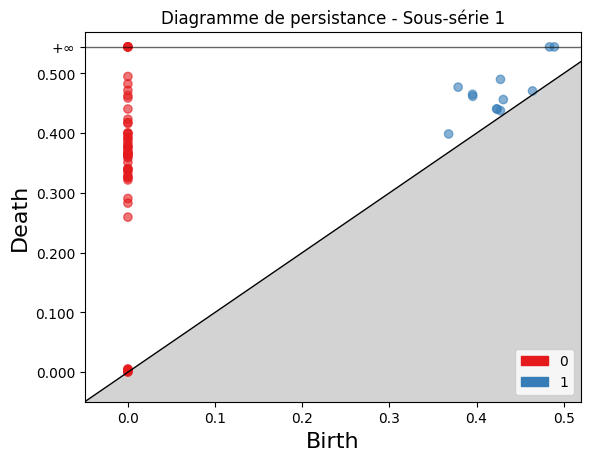

Sous-série 2: Diagramme de persistance


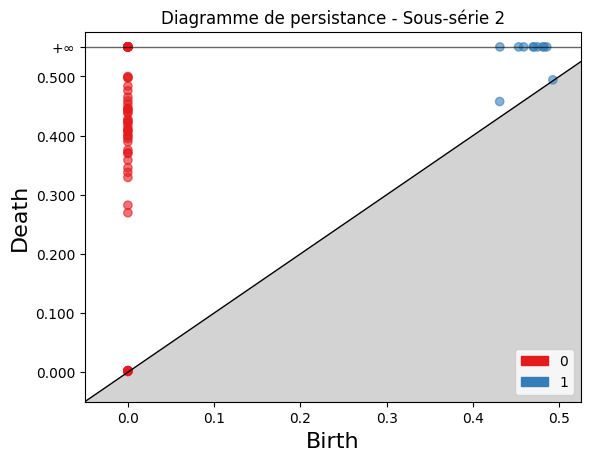

Sous-série 3: Diagramme de persistance


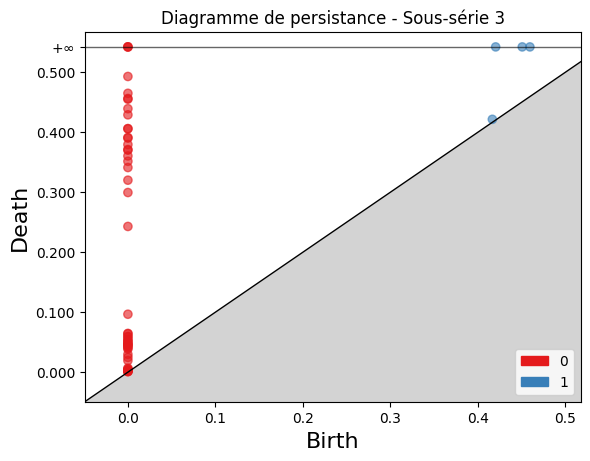

Sous-série 4: Diagramme de persistance


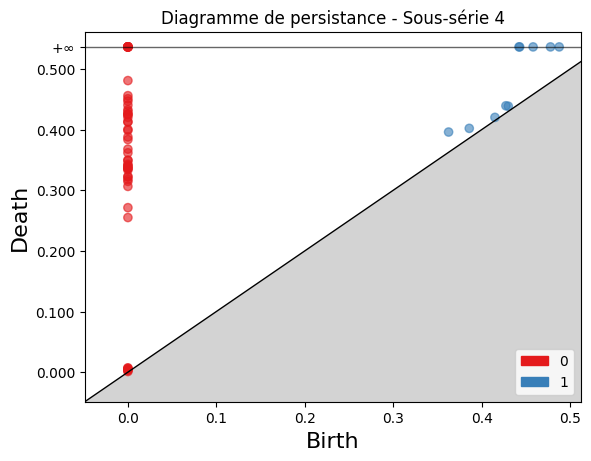

Sous-série 5: Diagramme de persistance


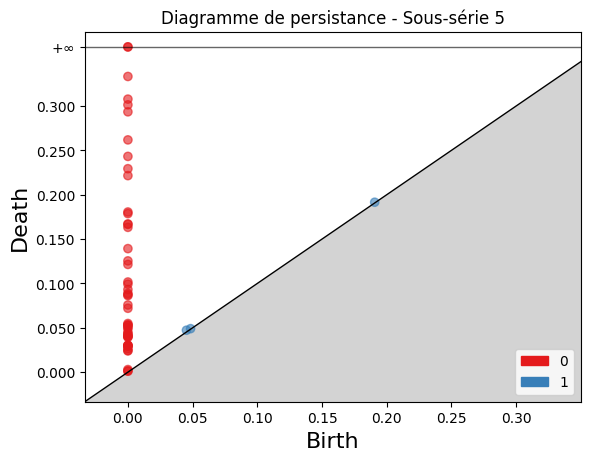

Sous-série 6: Diagramme de persistance


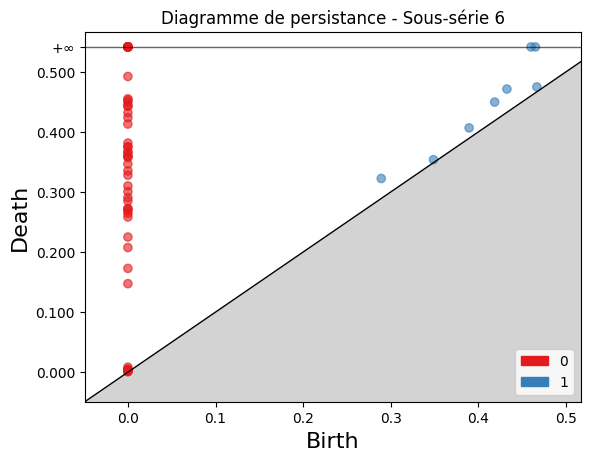

Sous-série 7: Diagramme de persistance


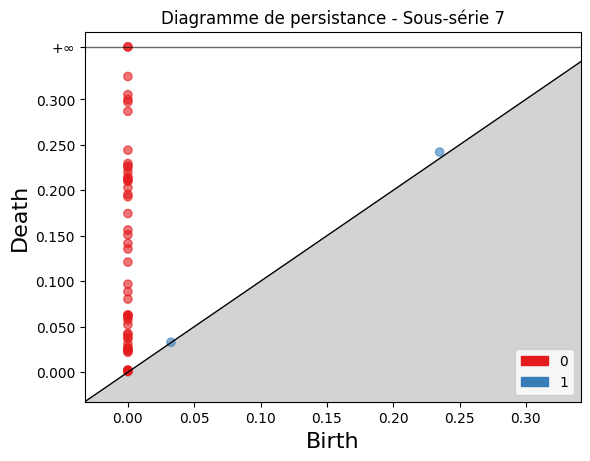

Sous-série 8: Diagramme de persistance


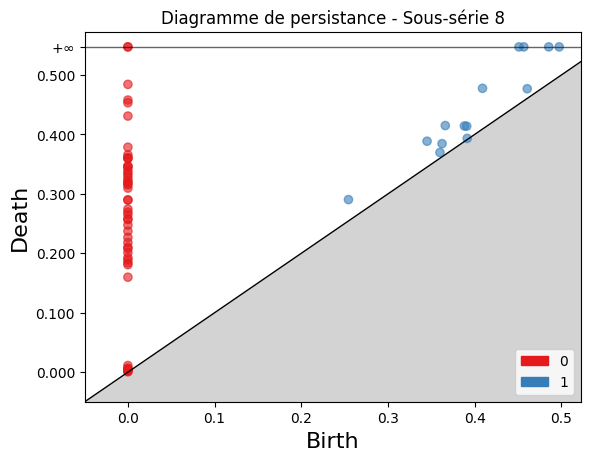

Sous-série 9: Diagramme de persistance


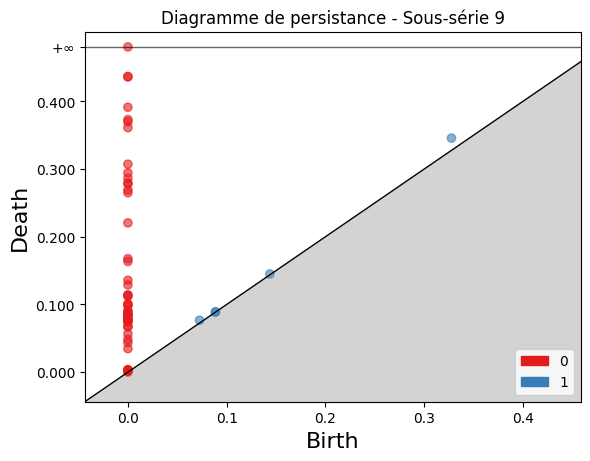

Sous-série 10: Diagramme de persistance


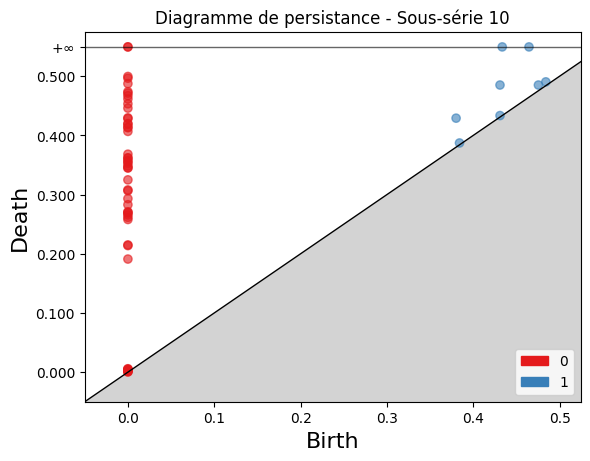

Sous-série 11: Diagramme de persistance


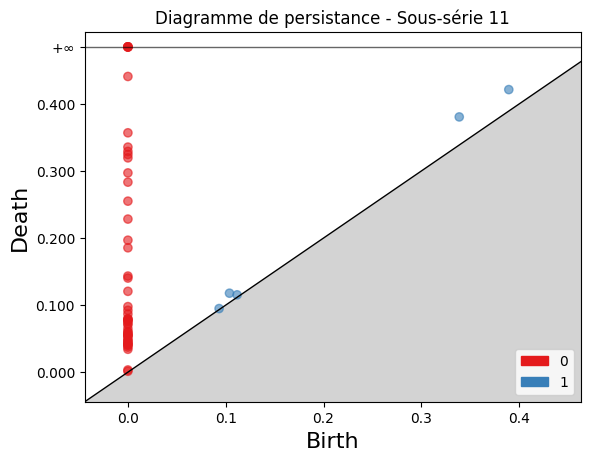

Sous-série 12: Diagramme de persistance


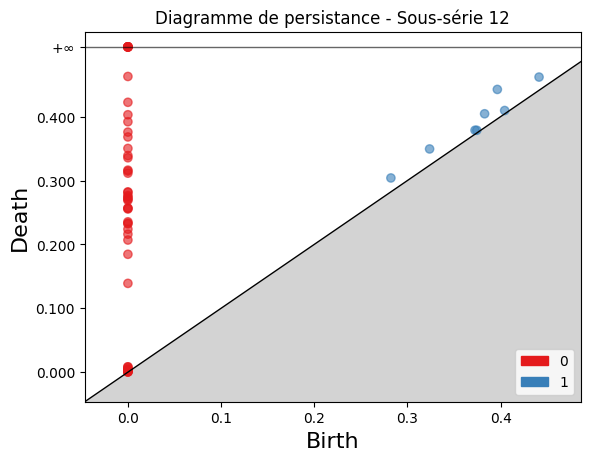

Sous-série 13: Diagramme de persistance


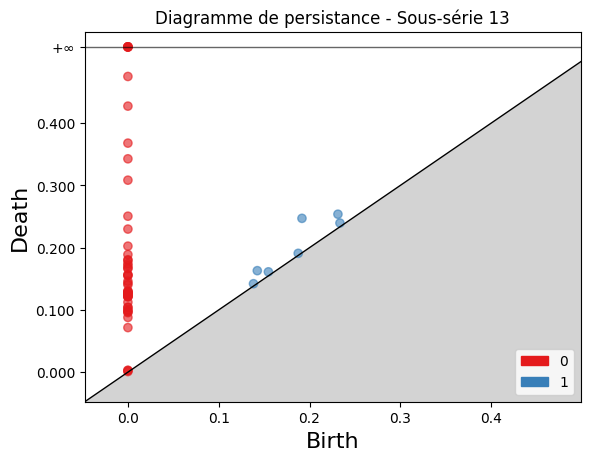

Sous-série 14: Diagramme de persistance


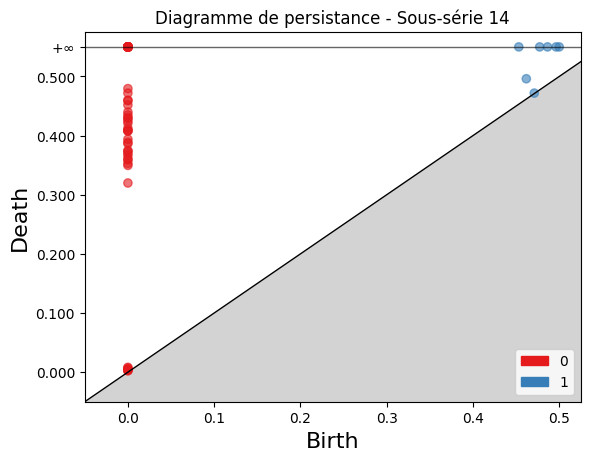

Sous-série 15: Diagramme de persistance


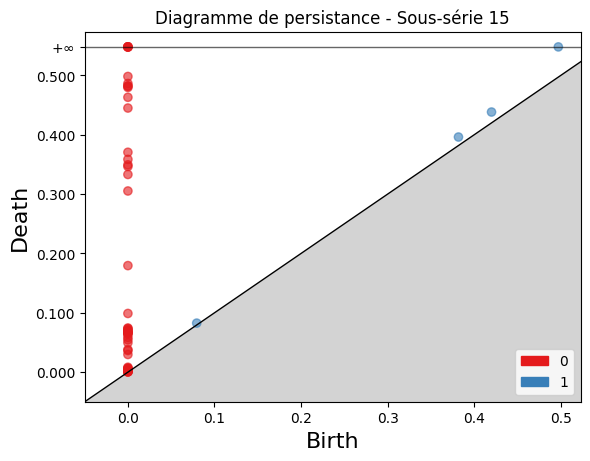

Sous-série 16: Diagramme de persistance


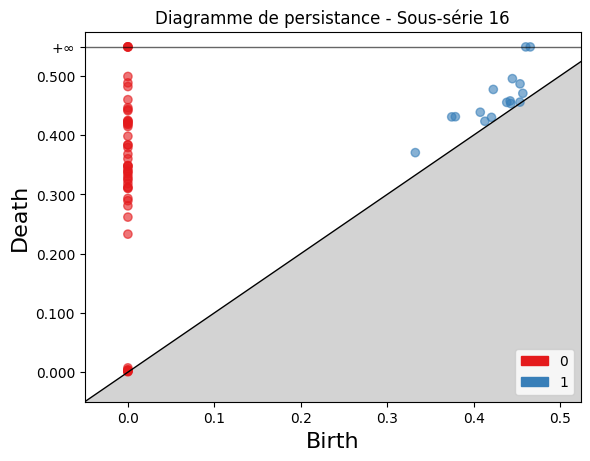

Sous-série 17: Diagramme de persistance


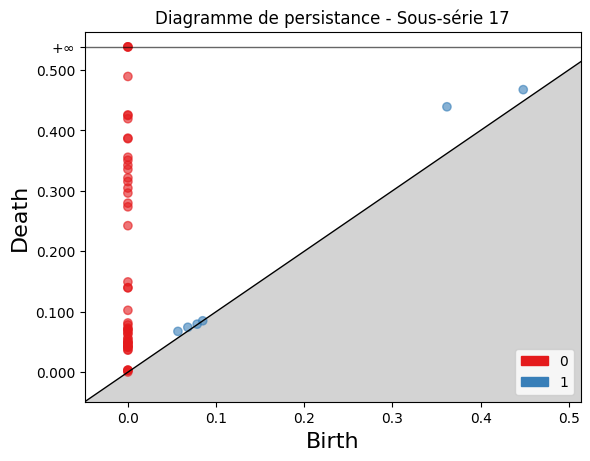

Sous-série 18: Diagramme de persistance


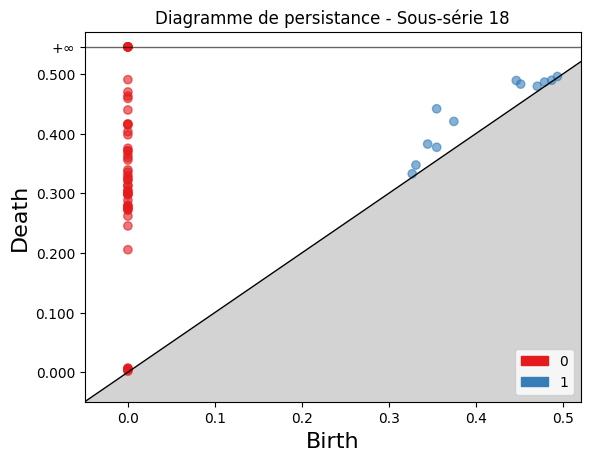

Sous-série 19: Diagramme de persistance


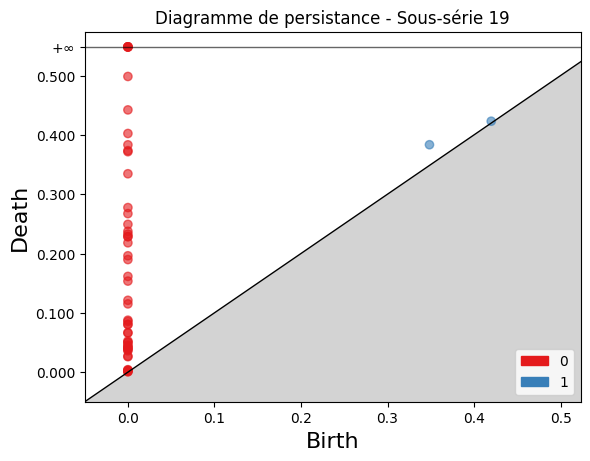

Sous-série 20: Diagramme de persistance


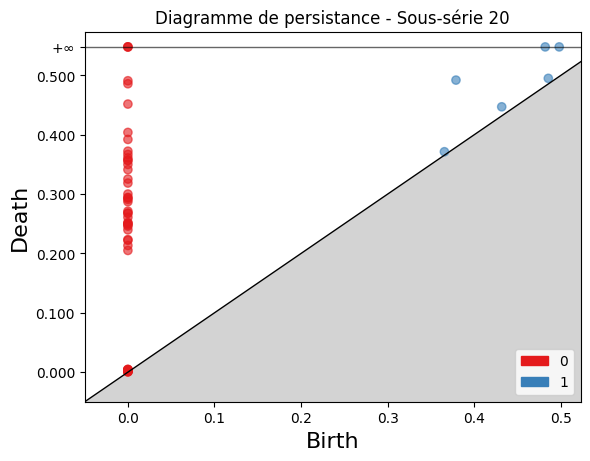

Sous-série 21: Diagramme de persistance


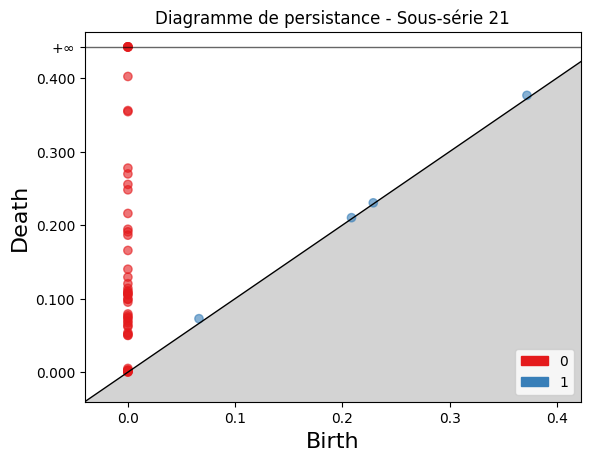

Sous-série 22: Diagramme de persistance


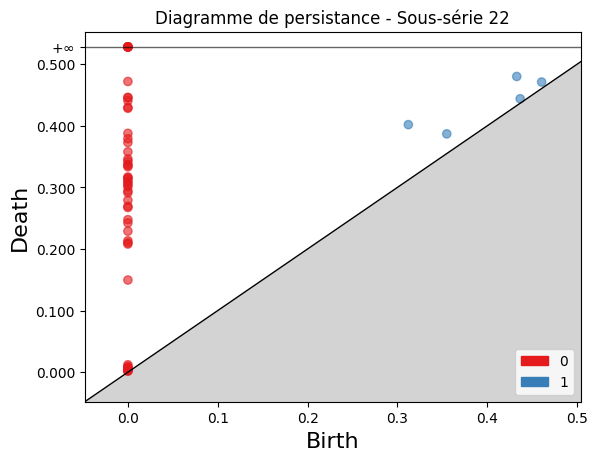

Sous-série 23: Diagramme de persistance


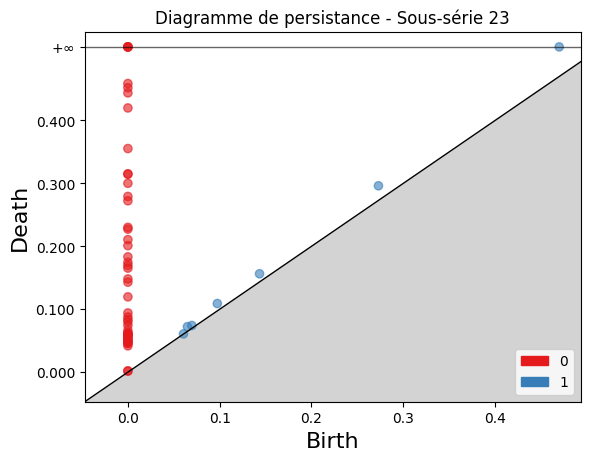

Sous-série 24: Diagramme de persistance


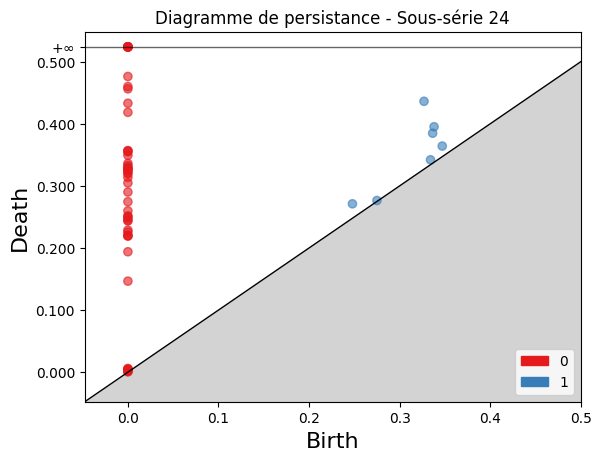

Sous-série 25: Diagramme de persistance


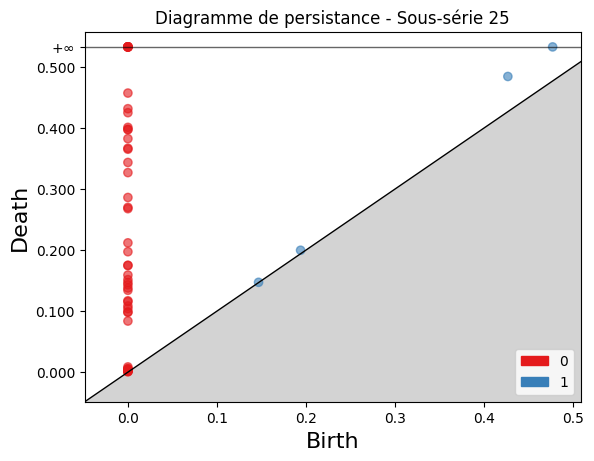

In [ ]:
import gudhi as gd
import matplotlib.pyplot as plt

# Calcul et visualisation de la persistance pour chaque sous-série
for i, simplex_tree in enumerate(rips_complexes):
    # Calculer la persistance
    pers = simplex_tree.persistence()

    # Afficher le diagramme de persistance
    print(f"Sous-série {i + 1}: Diagramme de persistance")
    gd.plot_persistence_diagram(pers)
    plt.title(f"Diagramme de persistance - Sous-série {i + 1}")
    plt.show()


Axe des abscisses (Birth) : Indique la valeur de filtration à laquelle une caractéristique topologique (composante connexe, cycle, etc.) apparaît.
Axe des ordonnées (Death) : Indique la valeur de filtration à laquelle cette caractéristique disparaît.
Les points proches de la diagonale (ligne
y=x) représentent des caractéristiques éphémères (faible persistance, souvent associées à du bruit).
Les points loin de la diagonale sont plus persistants et souvent plus significatifs.

Ignore les points proches de la diagonale, car ils représentent des caractéristiques peu robustes.

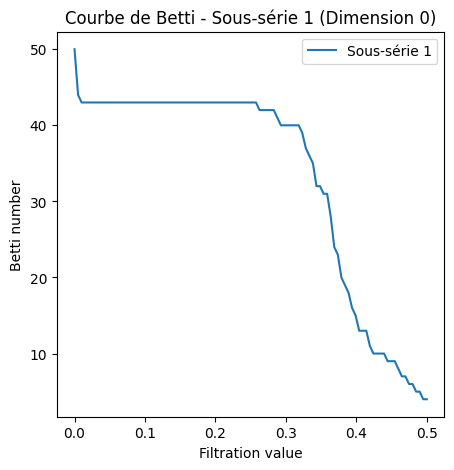

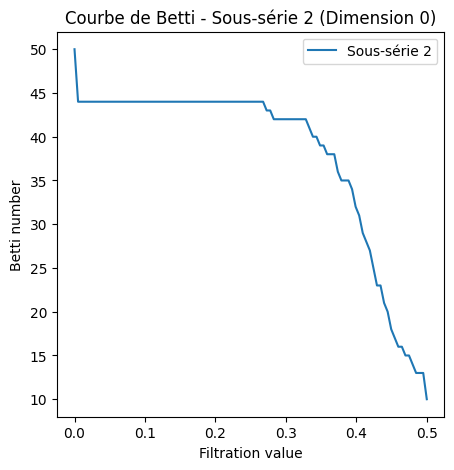

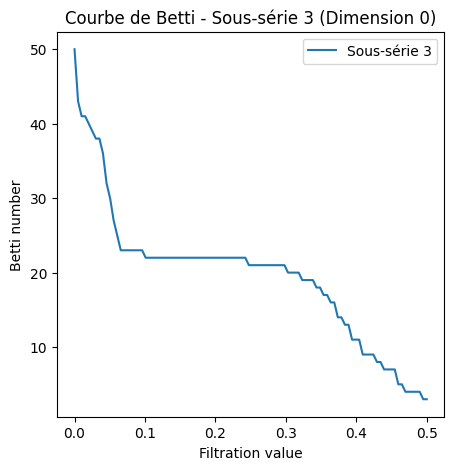

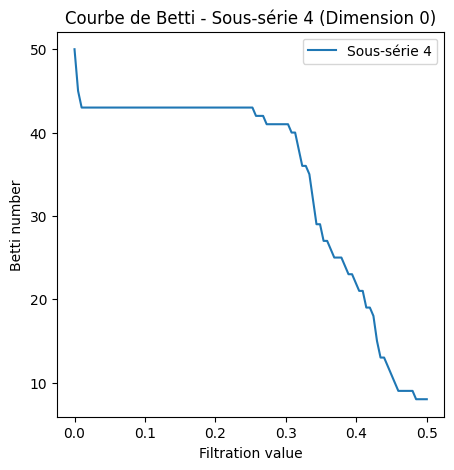

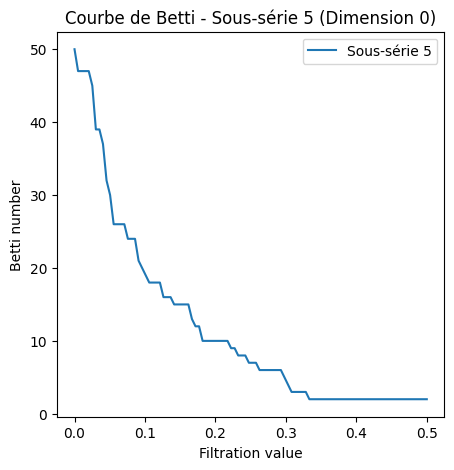

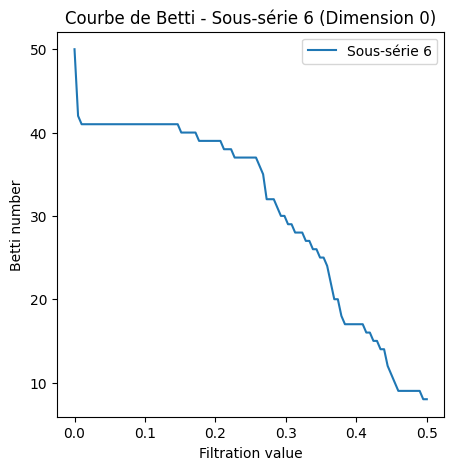

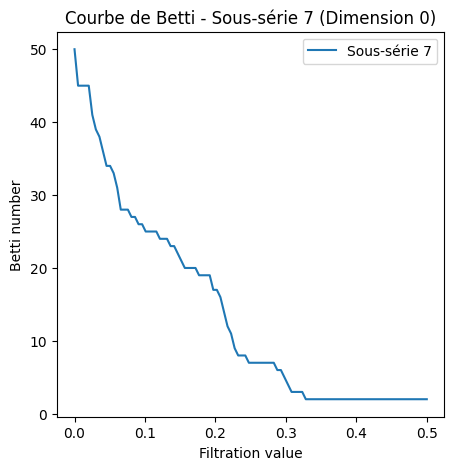

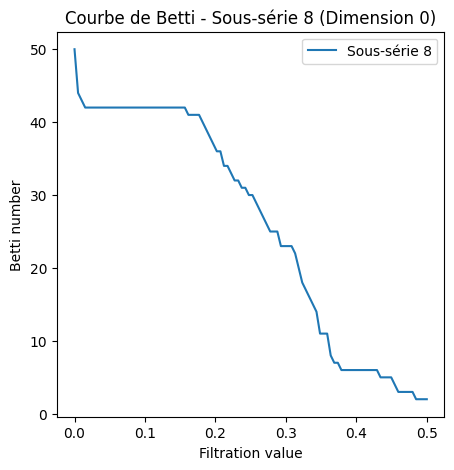

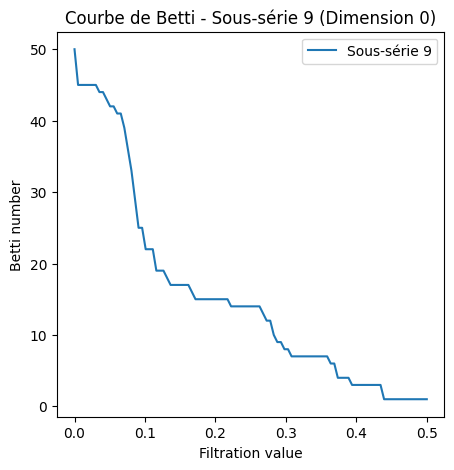

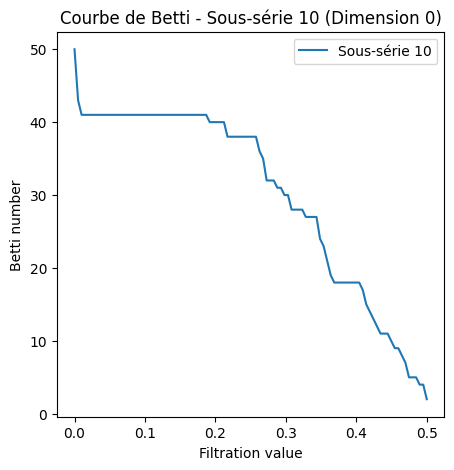

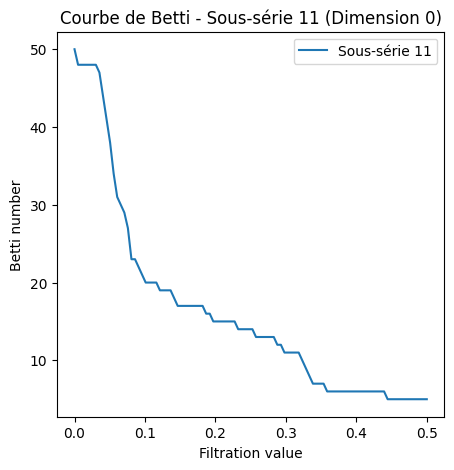

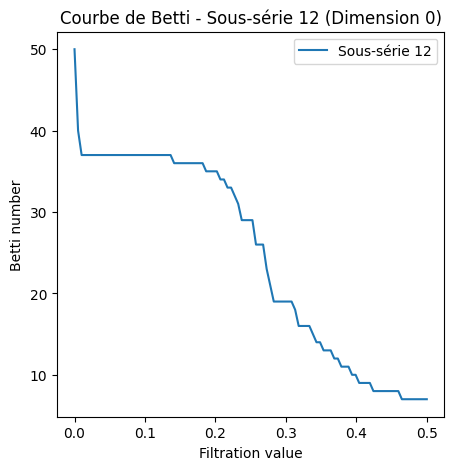

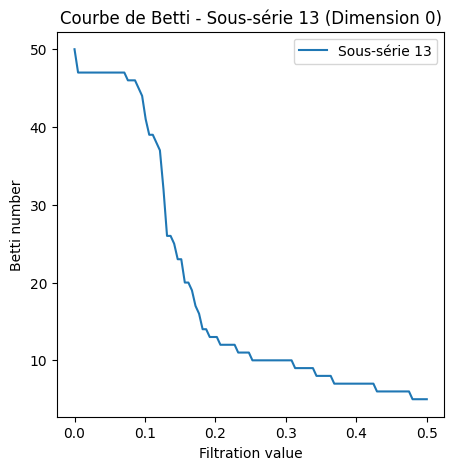

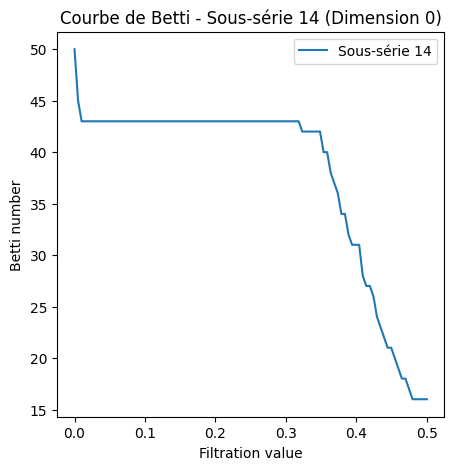

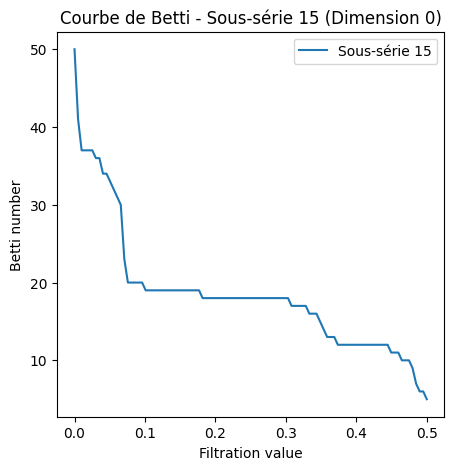

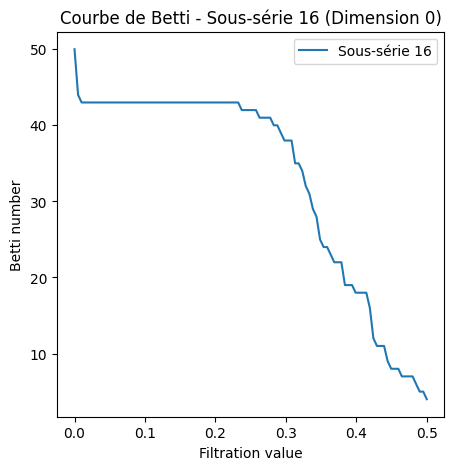

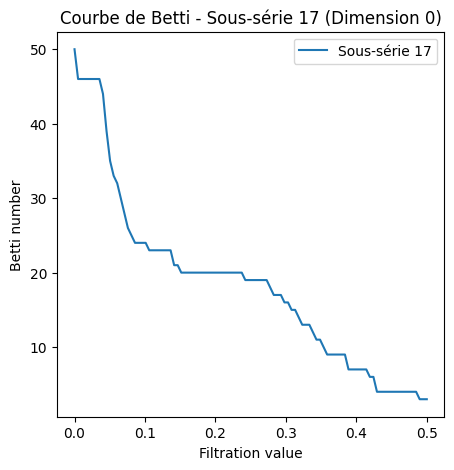

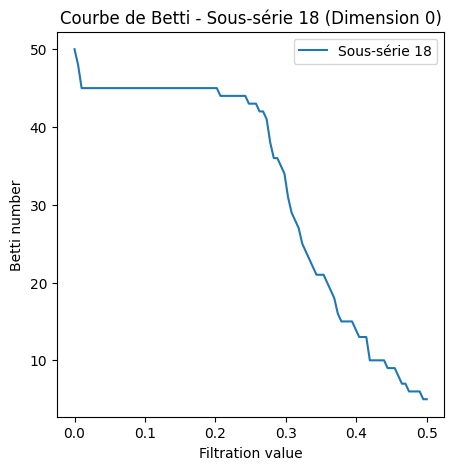

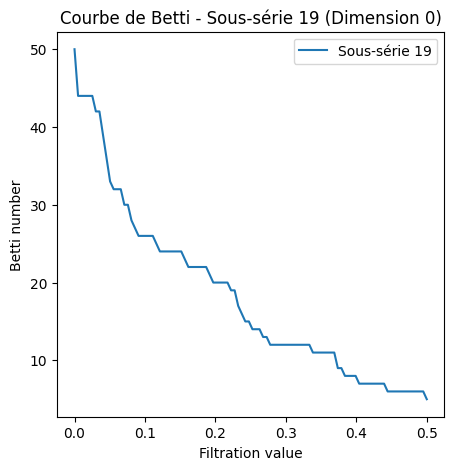

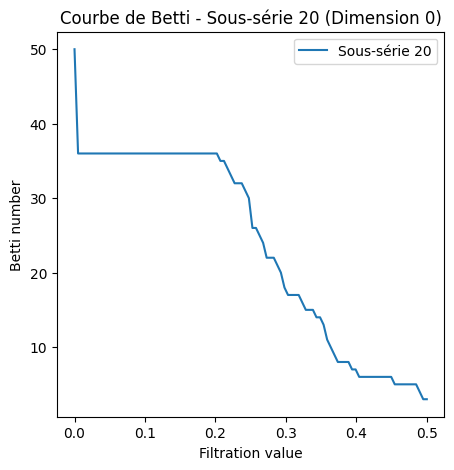

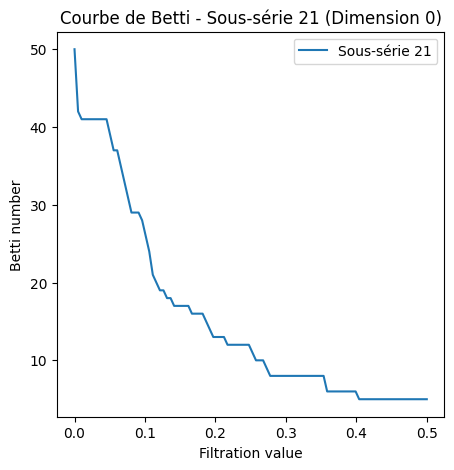

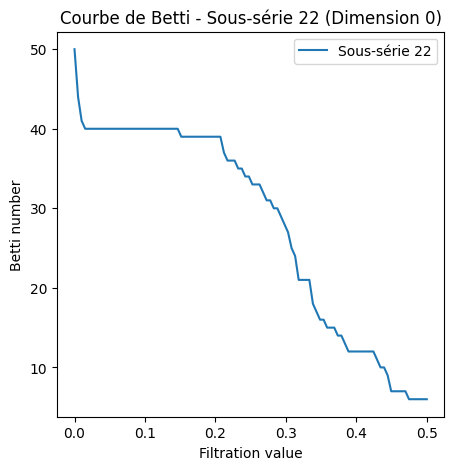

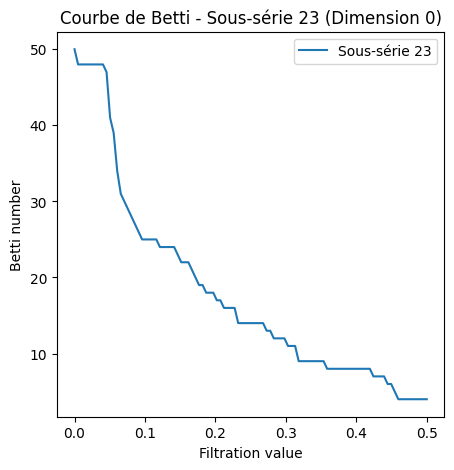

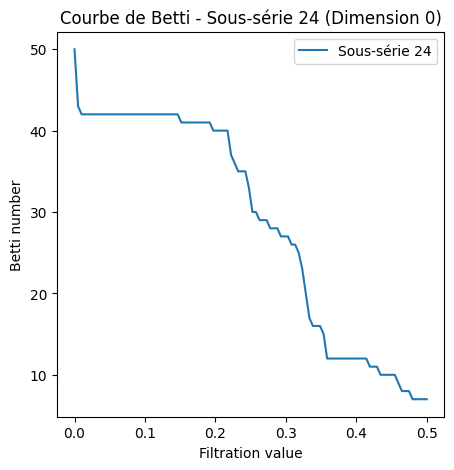

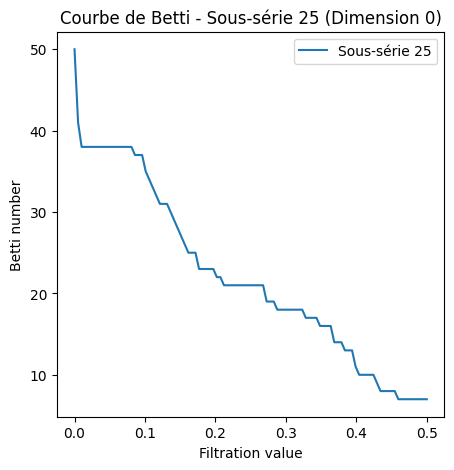

In [ ]:
from gudhi.representations import BettiCurve
import numpy as np
import matplotlib.pyplot as plt

# Paramètres pour calculer les courbes de Betti
sample_range = [0, 0.5]  # Intervalle sur lequel calculer les courbes
n_samples = 100  # Nombre de points d'échantillonnage
sample_points = np.linspace(sample_range[0], sample_range[1], n_samples)

betti_curves = BettiCurve(sample_range=sample_range)#, n_values=n_samples)

# Calculer et tracer les courbes de Betti pour chaque sous-série
for i, simplex_tree in enumerate(rips_complexes):
    # Extraire les intervalles de persistance pour la dimension 0
    intervals_dim_0 = simplex_tree.persistence_intervals_in_dimension(0)

    # Calculer la courbe de Betti pour la dimension 0
    betti_curve_dim_0 = betti_curves.fit_transform([intervals_dim_0])[0]

    # Tracer la courbe de Betti
    plt.figure(figsize=(5, 5))
    plt.plot(sample_points, betti_curve_dim_0, label=f"Sous-série {i + 1}")
    plt.title(f"Courbe de Betti - Sous-série {i + 1} (Dimension 0)")
    plt.xlabel("Filtration value")
    plt.ylabel("Betti number")
    plt.legend()
    plt.show()


Il semble y avoir deux types de courbes similaires, ce qui suggère que les points dans les  sous-séries se regroupent progressivement en deux ensemble à mesure que la filtration progresse. Les similitudes dans les courbes indiquent des structures similaires dans ces sous-séries.

In [30]:
!pip install gudhi
!pip install giotto-tda

**Complexe simplicial :** Un graphe Mapper permettant d'explorer les relations topologiques entre les points et de visualiser les `classes` sera généré.

In [ ]:
from gtda.mapper import make_mapper_pipeline, CubicalCover, plot_static_mapper_graph
from sklearn.cluster import DBSCAN
import numpy as np

# Configuration de la pipeline Mapper
n_intervals = 10  # Nombre d'intervalles pour la couverture
overlap = 0.3  # Fraction de chevauchement entre les intervalles
epsilon = 0.1  # Paramètre epsilon pour DBSCAN

pipe = make_mapper_pipeline(
    filter_func=None,  # Utilise les données telles quelles pour l'instant
    cover=CubicalCover(n_intervals=n_intervals, overlap_frac=overlap),
    clusterer=DBSCAN(eps=epsilon),  # Clustering avec DBSCAN
    n_jobs=1
)

# Préparation des données pour le Mapper
# Vous avez déjà normalisé les données numériques. On extrait ici uniquement les colonnes pertinentes.
point_cloud = data[numeric_columns].to_numpy()

# Application de la pipeline Mapper
graph = pipe.fit_transform(point_cloud)

# Paramètres pour le tracé
plotly_params = {"node_trace": {"marker_colorscale": "Blues"}}

# Coloration des nœuds par la colonne 'class' si elle existe
if 'class' in data.columns:
    color_data = data['class']
else:
    color_data = None  # Pas de coloration si 'class' est absente

# Tracé du graphe Mapper
fig = plot_static_mapper_graph(pipe, point_cloud, color_data=color_data, plotly_params=plotly_params)
fig.show()


*   Chaque nœud représente un cluster de points de données similaires dans un intervalle donné.
*   Les arêtes connectent des nœuds dont les clusters partagent des points (chevauchement des clusters dans différents intervalles).

Les couleurs des nœuds sont basées sur les valeurs d'une variable choisie :

*   Une **valeur claire** indique une classe ou un attribut faible.
*   Une **valeur foncée** indique une classe ou un attribut fort.


Les zones fortement connectées (avec beaucoup de nœuds et d'arêtes) représentent des régions où les données sont denses.

Les nœuds isolés ou faiblement connectés indiquent des régions de faible densité ou des anomalies.







Calcul de la persistence créé

In [23]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from gtda.mapper import make_mapper_pipeline, CubicalCover, plot_static_mapper_graph
from sklearn.cluster import DBSCAN

# URL du fichier de données
url = "https://remivaucher.github.io/files/1_raw_data_13-12_22.03.16.txt"

# Charger les données dans un DataFrame
data = pd.read_csv(url, sep="\t")

# Identifier où les changements de label se produisent
changes = data['class'].diff().ne(0)  # Identifier les indices où la classe change
change_indices = changes[changes].index.tolist()

# Ajouter le premier et le dernier index pour compléter les sous-séries
if 0 not in change_indices:
    change_indices.insert(0, 0)
change_indices.append(len(data))

# Créer les sous-séries
sub_series = []
for i in range(len(change_indices) - 1):
    sub_series.append(data.iloc[change_indices[i]:change_indices[i + 1]])

On enlève la colonne `class` à chaque sous-série avant de construire le **complexe simplicial**

In [20]:
sub_series = [sub.drop(columns=['class']) for sub in sub_series]

In [21]:
# Normalisation par sous-série
normalized_sub_series = []
scaler = MinMaxScaler()

for sub in sub_series:
    # Identifier les colonnes numériques
    numeric_columns = sub.select_dtypes(include=['float64', 'int64']).columns

    # Normaliser les colonnes numériques
    sub_scaled = sub.copy()
    sub_scaled[numeric_columns] = scaler.fit_transform(sub[numeric_columns])
    normalized_sub_series.append(sub_scaled)

# Configuration de la pipeline Mapper
n_intervals = 10  # Nombre d'intervalles pour la couverture
overlap = 0.3  # Fraction de chevauchement entre les intervalles
epsilon = 0.1  # Paramètre epsilon pour DBSCAN

pipe = make_mapper_pipeline(
    filter_func=None,  # Aucun filtrage spécifique
    cover=CubicalCover(n_intervals=n_intervals, overlap_frac=overlap),
    clusterer=DBSCAN(eps=epsilon),  # Clustering avec DBSCAN
    n_jobs=1
)

# Appliquer la pipeline Mapper à chaque sous-série normalisée
for i, sub_data in enumerate(normalized_sub_series):
    print(f"Traitement de la sous-série {i + 1} sur {len(normalized_sub_series)}")

    # Extraction des colonnes numériques de la sous-série
    numeric_columns = sub_data.select_dtypes(include=['float64', 'int64']).columns
    point_cloud = sub_data[numeric_columns].to_numpy()

    # Application de la pipeline Mapper
    graph = pipe.fit_transform(point_cloud)

    # Paramètres pour le tracé
    plotly_params = {"node_trace": {"marker_colorscale": "Blues"}}
    color_data = sub_data['class'] if 'class' in sub_data.columns else None

    # Tracé du graphe Mapper
    fig = plot_static_mapper_graph(pipe, point_cloud, color_data=color_data, plotly_params=plotly_params)
    fig.update_layout(title=f"Graphe Mapper pour la sous-série {i + 1}")
    fig.show()


Traitement de la sous-série 1 sur 25


Traitement de la sous-série 2 sur 25


Traitement de la sous-série 3 sur 25


Traitement de la sous-série 4 sur 25


Traitement de la sous-série 5 sur 25


Traitement de la sous-série 6 sur 25


Traitement de la sous-série 7 sur 25


Traitement de la sous-série 8 sur 25


Traitement de la sous-série 9 sur 25


Traitement de la sous-série 10 sur 25


Traitement de la sous-série 11 sur 25


Traitement de la sous-série 12 sur 25


Traitement de la sous-série 13 sur 25


Traitement de la sous-série 14 sur 25


Traitement de la sous-série 15 sur 25


Traitement de la sous-série 16 sur 25


Traitement de la sous-série 17 sur 25


Traitement de la sous-série 18 sur 25


Traitement de la sous-série 19 sur 25


Traitement de la sous-série 20 sur 25


Traitement de la sous-série 21 sur 25


Traitement de la sous-série 22 sur 25


Traitement de la sous-série 23 sur 25


Traitement de la sous-série 24 sur 25


Traitement de la sous-série 25 sur 25
